Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [3]:
NAME = "Rea Rustagi"
COLLABORATORS = ""

---

In [7]:
from __future__ import print_function
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

# Homework 1:  Introduction

## Question 1 - Basic Linear Algebra

Write out the solution (by-hand) to the following sets of equations.  **FULLY** justify your solution (do not just write the answer).

If you want to review some of these concepts check out Strang's [Linear Algebra](https://clio.columbia.edu/catalog/10612929) text or for only the fundamentals check out Strang's [The Fundamental Theorem of Linear Algebra](http://www.jstor.org/stable/2324660?seq=1#page_scan_tab_contents)

**(a)** (5) Solve $A x = \mathbf{b}$ where
$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3
    \end{bmatrix} ~~~~ 
    \mathbf{b} = \begin{bmatrix}
        1 \\
        -2
    \end{bmatrix}
$$

First we must verify that the matrix A is invertible. By inspection, we can see that the columns
are linearly independent, affirming that A is invertible. We can use the 2x2 matrix inversion formula now.

$$
A^{-1}=
\begin{bmatrix}
          a_{11} & a_{12} \\ 
          a_{21} & a_{22}
       \end{bmatrix}^{-1}
       =
\frac{1}{\lvert A\rvert}
       \begin{bmatrix}
           a_{22} & -a_{12} \\ 
          -a_{21} &  a_{11}
       \end{bmatrix}
$$

Applying this to matrix A:

$$
A^{-1}=
\frac{1}{(2*3)-(1*1)}
\begin{bmatrix}
        3 & -1 \\ 
        -1 &  2
\end{bmatrix}
=\frac{1}{5}
\begin{bmatrix}
        3 & -1 \\ 
        -1 &  2
\end{bmatrix}
$$

Rearranging 
$A x = \mathbf{b}$ as $ x = \mathbf{b} A^{-1} $,
We find that the solution is:
$$
x = \frac{1}{5}
\begin{bmatrix}
        1 \\
        -2
    \end{bmatrix} 
\begin{bmatrix}
        3 & -1 \\ 
        -1 &  2
\end{bmatrix}
= \begin{bmatrix}
        1 \\
        -1
  \end{bmatrix}
$$

**(b)** (5) Solve the system of equations:
\begin{align}
    2x + 3y &= 1 \\
    6x + 9y &= 3
\end{align}

We can rewrite this system in matrix form as:
$$
\begin{bmatrix}
        2 & 3 & 1 \\ 
        6 & 9 & 3 
\end{bmatrix}
$$
Divide Row I by 2:
$$
\begin{bmatrix}
        1 & \frac{3}{2} & \frac{1}{2} \\ 
        6 & 9 & 3 
\end{bmatrix}
$$
Subtract Row I * 6 from Row II:
$$
\begin{bmatrix}
        1 & \frac{3}{2} & \frac{1}{2} \\ 
        0 & 0 & 0 
\end{bmatrix}
$$
We can see that this is a system of infinite solutions, where the pair $(x,y) = ( x , \frac{1}{3} - \frac{2}{3}x )$
for any x will provide a solution.

**(c)** (5) Why will I not be able to solve $A\mathbf{x}=\mathbf{b}$ for

$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3 \\
        0 & 4
    \end{bmatrix} ~~~~ 
    \mathbf{b} = \begin{bmatrix}
        2 \\
        0 \\
        1
    \end{bmatrix}?
$$

Explain why this is a problem in terms of the four fundamental subspace of the matrix  $A$ and how that relates to the vector $\mathbf{b}$.

The subspace of any matrix is composed of all linear combinations of its columns. For there to be a solution to $A\mathbf{x}=\mathbf{b}$, $\mathbf{b}$ would have to be within the subspace of A. However, we can see by inspection that $\mathbf{b}$ cannot be made by any linear combination of A's columns; therefore, there is no solution. 

## Question 2 -- a simple python function

**(a)** (10) Write a function that computes
$$
    \sum^\infty_{n=1} \frac{a^n}{b^{n-1}}
$$
until the difference between subsequent partial sums is less than the given tolerance $T$.  Return the computed sum.  Make sure to include a way for the function to exit if the partial sums do not satisfy the above criteria (the sum may not be convergent for instance). Remember to raise an exception if the sum does not converge.

Also, please,  remove the `# YOUR CODE HERE` and `raise NotImplementedError` lines in your final code. (Hopefully you did implement it and the exception is not needed).

In [8]:
def compute_sum(a, b, tolerance=1e-5):
    """Compute the sum $\sum^\infty_{n=1} a^n / b^{n-1} until the partial sums are less than *tolerance*.
    
    Returns the computed sum and raises a *ValueError* if the sum appears to be diverging.
    """
    # By using properties of exponents, we can see that if a/b >= 1, the sum will explode. Therefore,
    # we will raise an error for this condition
    
    if abs(a / b) >= 1:
        raise ValueError()
        
    n = 1
    last_sum = 0
    computed_sum = 0
    
    while True:
        term = (a**n) / (b**(n - 1))
        computed_sum += term
        
        if abs(computed_sum - last_sum) < tolerance:
            return computed_sum
        
        last_sum = computed_sum
        n += 1

In [9]:
numpy.testing.assert_allclose(compute_sum(-2.0, 3.0, 1e-16), -1.2)
numpy.testing.assert_allclose(compute_sum(1.0, 2.0, 1e-16), 2.0)
try:
    compute_sum(2.0, 1.0, 1e-16)
except ValueError:
    pass
else:
    assert False

**(b)** (5) Explore different tolerances for your function above for $a=-2$ and $b=3$.  Plot the value of the absolute error
$$
    e = \left| ~ \sum^\infty_{n=1} \frac{a^n}{b^{n-1}} - (-1.2) ~\right |
$$
as a function of the tolerance.  The plotting command `loglog` may be useful to effectively visualize the problem.  What do you observe?

Hint:  Try using tolerances in the range $T \in [10^{-30}, 10^{-2}]$.  Use the functions `logspace` to generate well spaced points and `loglog` to plot the data.

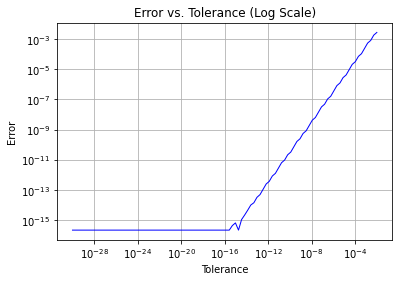

In [10]:
test_tol = numpy.logspace(-30,-2, 100).tolist()
error_vals = []
for t in test_tol:
    error_vals.append(abs(compute_sum(-2, 3, t) - (-1.2)))

plt.loglog(test_tol, error_vals, 'b-', linewidth=1)
plt.ylabel('Error')
plt.xlabel('Tolerance')
plt.title("Error vs. Tolerance (Log Scale)")
plt.grid()
plt.show()

We can observe that for tolerances below approximately $10^{-16}$, error is about the same. Beyond approximately $10^{-15}$, there is a log-linear relationship between tolerance and error. 

## Question 3 - Taylor Series

(7) Compute the first 3 terms of the Taylor series of the function
$$
    f(x) = e^{-x^2} \sin( x - \pi)
$$
centered at $x_0 = \pi$. Hint: check using `Sympy`

First term: 
$$0$$
Second term:
$$
e^{-\pi^2}(x-\pi)
$$
Third term:
$$
-\frac{4\pi}{2e^{\pi^2}}(x-\pi)^2
$$

## Question 4 - Basic ODE's

(8) Solve the constant coefficient ODE (analytically)
$$
    u'' + u' + \frac{5}{4} u = 0
$$
with initial conditions $u(0) = 3$ and $u'(0) = 1$.  Comment on its behavior as $t \rightarrow \infty$.

We find that the roots of the characteristic equation, $r^2+r+\frac{5}{4} = 0$, are $r=-\frac{1}{2}\pm i$.
This means that the general solution is of the form:
$$
u = e^{-\frac{1}{2}t} (c_{1}cos(t)+c_{2}sin(t))
$$
Using the initial conditions, we find that the particular solution is:
$$
u = e^{-\frac{1}{2}t} (3cos(t)+\frac{5}{2}sin(t))
$$

Plot the solution $u(t)$

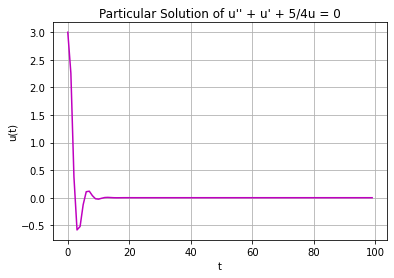

In [13]:
t = numpy.array(range(100))
u = numpy.exp(-0.5*t) * (3*numpy.cos(t) + 2.5*numpy.sin(t))

# Create the plot
plt.title("Particular Solution of u'' + u' + 5/4u = 0")
plt.ylabel('u(t)')
plt.xlabel('t')
plt.grid()
plt.plot(t,u,'m')

## Question 5 - using matplotlib

(5) Plot something "fun" making sure to label the axes and colorbar if appropriate.  Use the [matplotlib gallery](http://matplotlib.org/gallery.html) for inspiration.

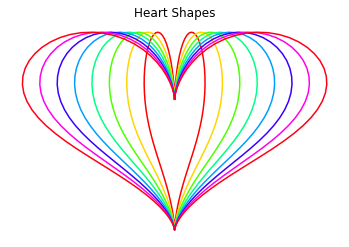

In [15]:
import matplotlib.cm as cm
from cycler import cycler

theta = numpy.linspace(0, 2*numpy.pi, 100)

x = 5*( numpy.sin(theta)**3 )
y = 10*numpy.cos(theta) - 5*numpy.cos(2*theta) - 2*numpy.cos(3*theta) - numpy.cos(4*theta)

sizes = numpy.linspace(1,5,8)
colors = plt.cm.hsv(numpy.linspace(0,1,8))
plt.gca().set_prop_cycle(cycler('color', colors))

for s in sizes:
    plt.plot(s*x, y)

plt.title('Heart Shapes')
plt.axis('off')
plt.show()

## Question 6 - The Trouble with Tribbles

**The Problem**
The number of tribbles (furry animals from Star Trek) is modeled by Spock to be exponential.  Spock predicts that in a 3 day period that the tribbles will go from an initial population number of $N_0 = 1$ to $N(3) = 1,771,561$ tribbles.  The assumptions that Spock made are the following:
 - The tribbles reproduce every 12 hours.
 - Tribbles reproduce asexually so that 1 tribble will produce 10 more tribbles leading to a total of 11 tribbles.

**(a)** (2) Write a function that confirms Spock's estimate

In [16]:
import math
def N(t):
    """ return the number of tribbles at time t (in days) given that 1 tribble will reproduce 
        asexually every 12 hours to produce 10 more tribbles.  N can be a real number
    """
    
    # Using a*e^(kt) model for growth. Found k (growth rate) using simple math.
    n_zero = 1
    k = 2*numpy.log(11)
    
    return round(n_zero*(math.exp(k*t)))

In [17]:
assert(N(3) == 1771561)

**(b)** (3) Make a plot of N(t) for t=3 days (assuming it is a continous function), using the appropriate plot types making sure to adding labels, units, and titles.  Also refer to the [matplotlib gallery](http://matplotlib.org/gallery.html) to figure out how to plot some of what is asked.

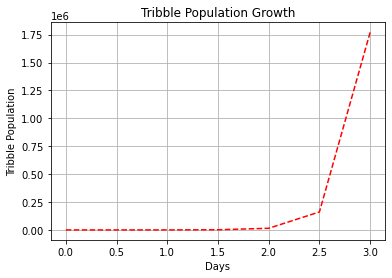

In [21]:
x = numpy.arange(0, 3.5, 0.5).tolist()
y = []
for t in x:
    y.append(N(t))
    
axes = plt.gca()
plt.plot(x, y,'r--')
plt.title("Tribble Population Growth")
plt.xlabel("Days")
plt.ylabel("Tribble Population")
plt.grid()
plt.show()

**(c)** [5] Assuming that tribbles cannot stack themselves on top of each other perfectly we also would like to model and plot the spread of tribbles throughout our space ship.  Assume our space ship is a square use the following function to plot the population on our space ship of tribbles:
$$
    N(x, y) = N_0 e^{-r^2/\sigma^2}
$$
where $N_0 = 1000$, $\sigma = 0.1$ and $r$ is the distance from the middle of our space ship.

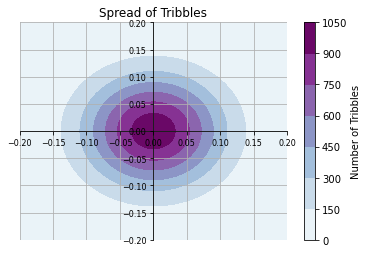

In [23]:
x = numpy.linspace(-0.2, 0.2, 100)
y = numpy.linspace(-0.2, 0.2, 100)
xx, yy = numpy.meshgrid(x, y)

N_zero = 1000
sigma = 0.1

fig = plt.figure()
ax = plt.gca()

z = N_zero * numpy.exp(-(numpy.square(xx)+numpy.square(yy)) / sigma**2)
h = plt.contourf(x,y,z, cmap = cm.BuPu)
plt.grid()
plt.colorbar(label="Number of Tribbles")
plt.title('Spread of Tribbles')

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plt.xticks(fontsize=8, rotation=0)
plt.yticks(fontsize=8, rotation=0)

plt.show()